**Problem description**

Correctly identify digits from a dataset of tens of thousands of handwriten images.

**Dataset**

- It has a dataset of 60k training images and 10k test images. 
- The digits have been size normalized and centered in a fixed-size image.
- http://yann.lecun.com/exdb/mnist/index.html

**Architecture**

- Neural network with one hidden layer with 128 units 
- output layer with 10 units. 
- Defined a callback function to stop training as soon as accuracy reaches 99.6%

**Libraries**
- tensorflow
- keras
- matplotlib

**performance:** This NN achieved 99.6% accuracy in 12 epochs.

### Import Libraries

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
%config IPCompleter.greedy=True

### Define call back function

In [56]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get("acc") >= .996):
            print("\n Reached 99.6% accuracy so cancelling training!")
            self.model.stop_training = True
        

### Load MNIST dataset

In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [12]:
print("shape of input images in the training set: {}".format(x_train.shape))
print("shape of output labels in the trainint set:{}".format(y_train.shape))
print("shape of test images: {}".format(x_test.shape))
print("shape of test labels: {}".format(y_test.shape))

shape of input images in the training set: (60000, 28, 28)
shape of output labels in the trainint set:(60000,)
shape of test images: (10000, 28, 28)
shape of test labels: (10000,)


### Analyze data before normalizing

Training label: 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

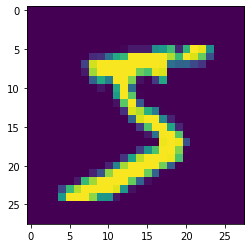

In [19]:
# Note that each pixels contains a number between 0 and 255
index = 0
plt.imshow(x_train[index])
print("Training label: {}".format(y_train[index]))
print(x_train[index])

### Normalize data

In [29]:
# After normalizing the data all the image pixels should be between 0 and 1
X_train, X_test = x_train / 255.0, x_test / 255.0
Y_train = y_train
Y_test = y_test

### Analyze the normalized data

Training label: 5
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
 

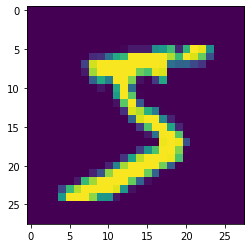

In [30]:
normal_index = 0
plt.imshow(X_train[index])
print("Training label: {}".format(y_train[index]))
print(X_train[index])

### Define, compile and train the NN model

In [39]:
print(X_train.shape)
Y_train.shape

(60000, 28, 28)


(60000,)

In [66]:
def train_mnist():
    
    # initialize the callback class created above
    callback = myCallback()
    
    # Sequential model with one hidden layer(128 neurons/units and relu activation function) and output layer
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation = tf.nn.relu),
        tf.keras.layers.Dense(10, activation = tf.nn.softmax)
    ])
    
    # compile the model defining the optimizer and loss function
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # print the summary of the model
    print(model.summary())
    
    # Fit/train the model
    history = model.fit(X_train, Y_train, epochs=20, callbacks=[callback])
    
    return history.epoch, history.history['acc'][-1]

In [67]:
history = train_mnist()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2576 - acc: 0.9274
Epoch 2/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1125 - acc: 0.9668
Epoch 3/20
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0786 - acc: 0.9764
Epoch 4/20
60000/60000 [==============================] - 6s 10